# Convolutional Neural Networks
In this notebook we will work with convolutional neural networks for classification

<img src="cnn.png">

## Exercise 1 (Load the data set)
Import the digits data set (MNIST) and visualize 10 instances of each digit. Prepare the data set so that each digit is a tensor of size $28 \times 28 \times 1$. The last component represent the number of channels. If the pictures would have colors then there would be 3 channels.

Using TensorFlow backend.


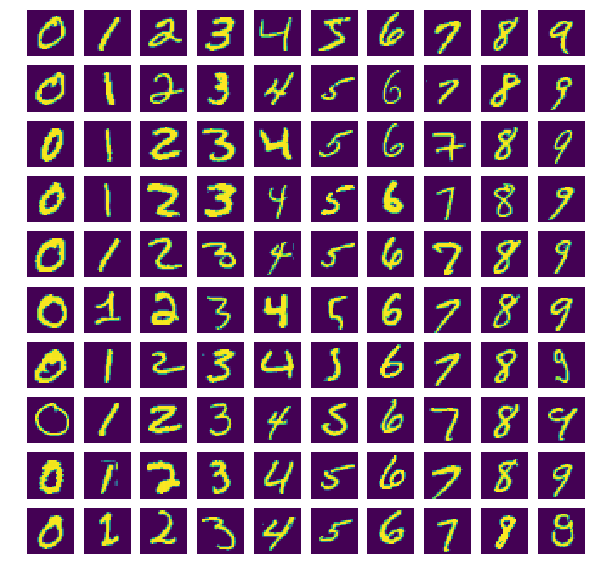

In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(10,10))
for j in range(10):
    for i in range(10):
        digit = x_train[y_train==i][j]
        plt.subplot(10, 10, 10*j+i+1)
        plt.imshow(digit)
        plt.axis('off')

        
# using the full data set will take a lot of time so we are only going to se a subset
x_train = x_train[:5000,:,:]
y_train = y_train[:5000]
        

# data preparation (images should be 28 x 28 x 1 tensors)
img_rows = 28
img_cols = 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# normalize images to have values between 0 and 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# convert the y vectors to binary vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Exercise 2 (Create and train a fully connected neural network)

Before we create our convolutional network we want create a standard fully connected network just like the ones we used before to classify the digits. Then we will be able to see the improvement when we use convolutions.

**a)** Create and train the network

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import adam


model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer=adam(0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [3]:
h = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 5000 samples, validate on 10000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 148us/step - loss: 0.9077 - acc: 0.7618 - val_loss: 0.3834 - val_acc: 0.8898
Epoch 2/10
5000/5000 [==============================] - 0s 82us/step - loss: 0.3189 - acc: 0.9108 - val_loss: 0.3324 - val_acc: 0.9054
Epoch 3/10
5000/5000 [==============================] - 0s 85us/step - loss: 0.2253 - acc: 0.9374 - val_loss: 0.2892 - val_acc: 0.9132
Epoch 4/10
5000/5000 [==============================] - 0s 77us/step - loss: 0.1785 - acc: 0.9486 - val_loss: 0.2663 - val_acc: 0.9186
Epoch 5/10
5000/5000 [==============================] - 0s 78us/step - loss: 0.1402 - acc: 0.9616 - val_loss: 0.2461 - val_acc: 0.9244
Epoch 6/10
5000/5000 [==============================] - 0s 74us/step - loss: 0.1175 - acc: 0.9692 - val_loss: 0.2282 - val_acc: 0.9318
Epoch 7/10
5000/5000 [==============================] - 0s 74us/step - loss: 0.0905 - acc: 0

**b)** Plot the accuracy on the training and validation sets

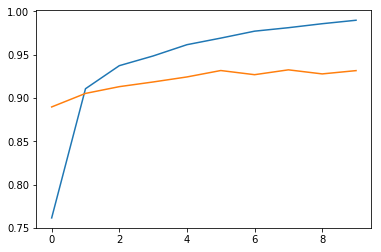

In [4]:
plt.plot(h.history['acc'], label='training')
plt.plot(h.history['val_acc'], label='validation')

**c)** Create and train a convolutional neural network

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

model = Sequential()
model = Sequential()
model.add(Conv2D(input_shape=input_shape, filters=32, kernel_size=(3, 3), activation='relu'))  
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=adam(0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
___________________________

In [6]:
h2 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1, batch_size=64)

Train on 5000 samples, validate on 10000 samples
Epoch 1/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.7657 - acc: 0.7624 - val_loss: 0.2617 - val_acc: 0.9207
Epoch 2/10
5000/5000 [==============================] - 32s 6ms/step - loss: 0.2693 - acc: 0.9190 - val_loss: 0.1453 - val_acc: 0.9547
Epoch 3/10
5000/5000 [==============================] - 34s 7ms/step - loss: 0.1703 - acc: 0.9512 - val_loss: 0.1198 - val_acc: 0.9621
Epoch 4/10
5000/5000 [==============================] - 36s 7ms/step - loss: 0.1388 - acc: 0.9586 - val_loss: 0.1267 - val_acc: 0.9617
Epoch 5/10
5000/5000 [==============================] - 36s 7ms/step - loss: 0.1102 - acc: 0.9670 - val_loss: 0.0888 - val_acc: 0.9717
Epoch 6/10
5000/5000 [==============================] - 35s 7ms/step - loss: 0.0881 - acc: 0.9728 - val_loss: 0.0909 - val_acc: 0.9719
Epoch 7/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.0679 - acc: 0.9778 - val_loss: 0.0877 - val_acc: 0.9730
Epoch 

**d)** Plot the accuracy on the training and validation sets and compare it to the results from the fully connected network.

(0.7, 1)

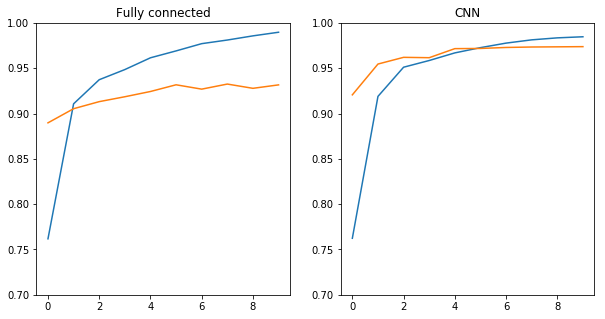

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2 , 1)
plt.plot(h.history['acc'], label='training')
plt.plot(h.history['val_acc'], label='validation')
plt.ylim([0.7,1])
plt.title('Fully connected')

plt.subplot(1, 2 , 2)
plt.title('CNN')
plt.plot(h2.history['acc'], label='training')
plt.plot(h2.history['val_acc'], label='validation')
plt.ylim([0.7,1])